# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica.

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("/content/penguins.csv")

penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
# Remove null values

# Remove rows with null in all columns
#penguins_clean = penguins_df.dropna(axis=0, how='all')
penguins_clean = penguins_df.dropna()
print(len(penguins_clean))

# Check if 'sex' nulls are more than 5%
cond = penguins_clean["sex"].isin(["FEMALE", "MALE"])

sex_null_ratio = len(penguins_clean[~cond])/ len(penguins_clean[cond]) * 100

print(sex_null_ratio)

# The ratio es less than 5%, so I can just drop the rows with no sex
#penguins_clean = penguins_clean[cond]
print(len(penguins_clean))

335
0.29940119760479045
335


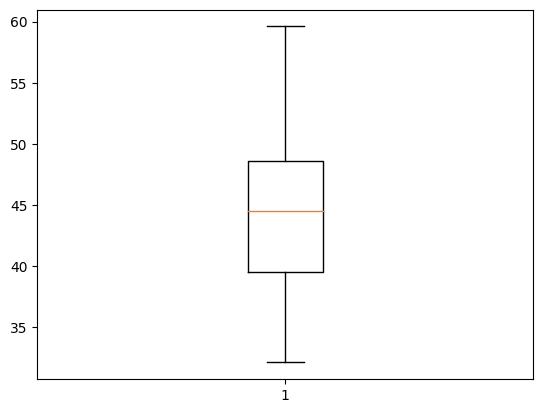

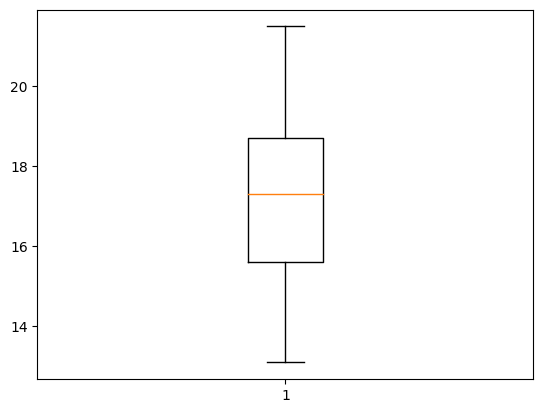

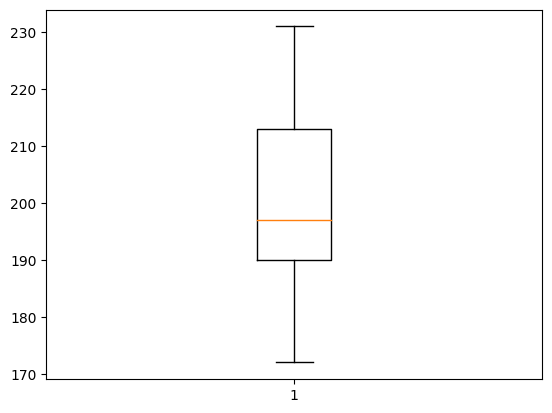

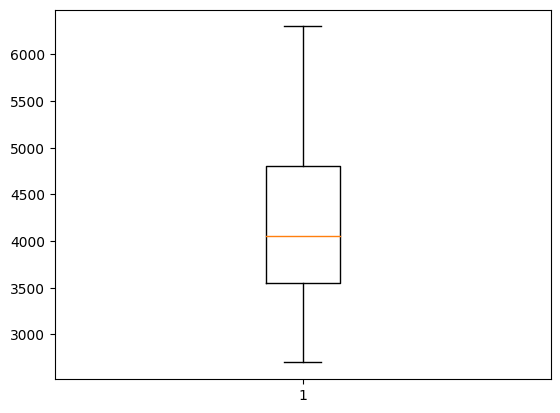

Number of rows: 333


In [9]:
# Check for outliers
columns = list(penguins_clean.columns[0:4])

for column in columns:
    plt.boxplot(penguins_clean[column])
    plt.show()

print("Number of rows: {}".format(len(penguins_clean)))

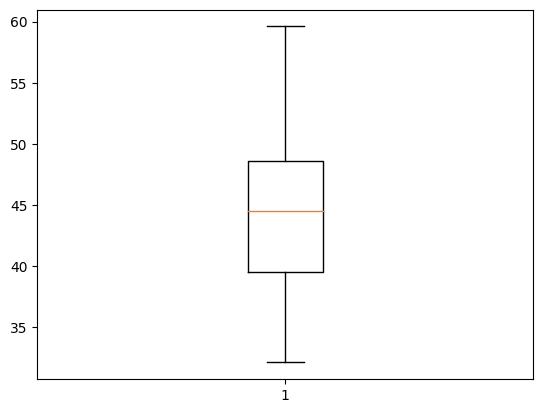

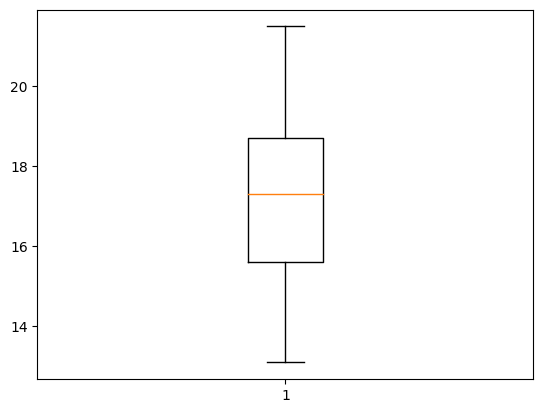

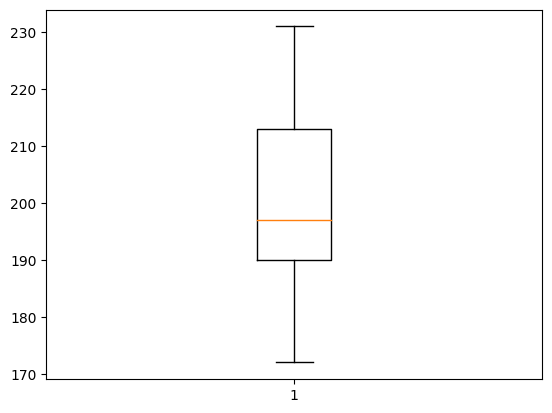

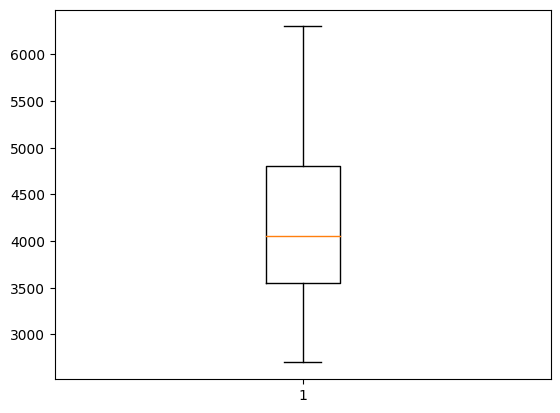

Number of rows in clean data: 333


In [10]:
# There are only 2 outliers in column 2 (flipper_length_mm)

# Function to remove outliers using IQR
def remove_outliers(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from flipper_length_mm column
penguins_clean = remove_outliers(penguins_clean, "flipper_length_mm")

# Remove outliers from all columns directly
#for column in columns:
#    penguins_clean = remove_outliers(penguins_clean, column)

for column in columns:
    plt.boxplot(penguins_clean[column])
    plt.show()

print("Number of rows in clean data: {}".format(len(penguins_clean)))

In [11]:
# One-hot-encode cleaned data
scaler = StandardScaler()
penguins_dummies = pd.get_dummies(penguins_clean, drop_first=True)

# Scale
scaler = StandardScaler()

penguins_preprocessed_array = scaler.fit_transform(penguins_dummies)

# Convert scaled_data back to a DataFrame
penguins_preprocessed = pd.DataFrame(penguins_preprocessed_array, columns=penguins_dummies.columns)

penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


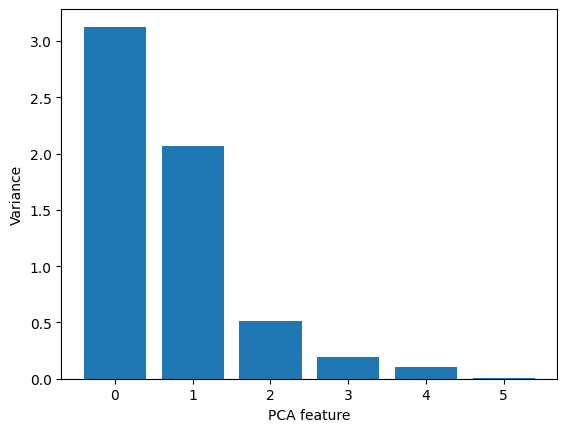

In [12]:
# perform Principal Component Analysis (PCA)

pca = PCA()
pca.fit(penguins_preprocessed)

# plot variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

n_components = 2

In [13]:
# Execute PCA using n_components=3

# Instantiate PCA
pca_3 = PCA(n_components= n_components)  # Reduce to 3 components

# Fit and transform the data
penguins_PCA = pca_3.fit_transform(penguins_preprocessed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

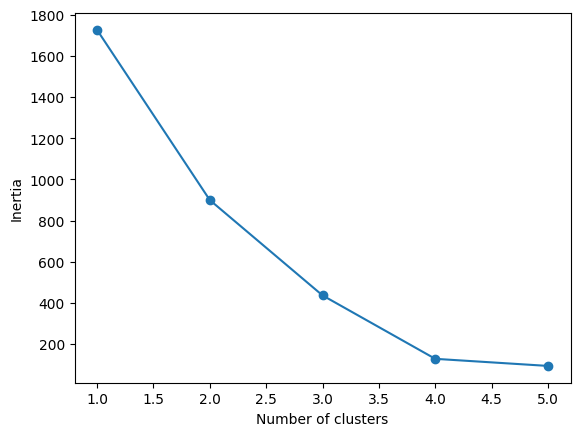

In [14]:
# Employ k-means clustering on the penguins_PCA dataset

# 1. Determine number of optimal clusters
ks = range(1,6)
inertias = []

for k in ks:
    # Create model
    model = KMeans(n_clusters= k)
    model.fit(penguins_PCA)

    inertias.append(model.inertia_)


plt.plot(ks, inertias, '-o')
plt.xlabel("Number of clusters")
plt.ylabel('Inertia')
plt.show()

n_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


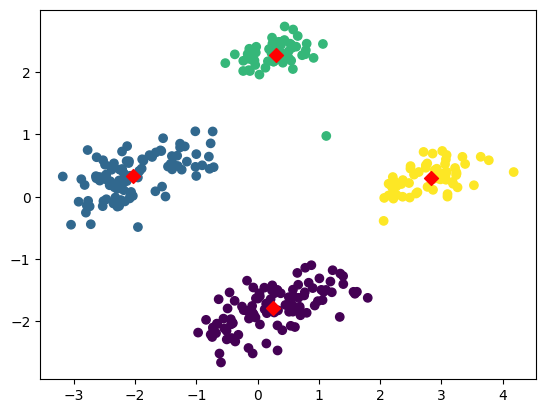

In [15]:
# Create and fit a new k-means cluster model, setting n_cluster = 3
kmeans = KMeans(n_clusters= n_clusters, random_state= 42)
kmeans.fit(penguins_PCA)

xs = penguins_PCA[:,0]
ys = penguins_PCA[:,1]

plt.scatter(xs, ys, c = kmeans.labels_)
#plt.show()

centroids = kmeans.cluster_centers_
cen_x = centroids[:,0]
cen_y = centroids[:,1]

plt.scatter(cen_x, cen_y, marker= 'D', s=50, c='red')
plt.show()

# Add "label" column extracted from the k-means clustering to penguins_clean.
penguins_clean["label"] = kmeans.labels_

In [16]:
# Finally, create a table containing average physical characteristics of the labels assigned:

numeric_columns = penguins_clean.columns[0:4]

stat_penguins= penguins_clean.groupby("label")[numeric_columns].mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
